In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
df = pd.read_csv('T-20 World cup 2022.csv')

In [89]:
# Calculate total runs scored by each player
player_runs = df.groupby('batsman1_name')['batsman1_runs'].sum().add(df.groupby('batsman2_name')['batsman2_runs'].sum(), fill_value=0)

# Calculate total wickets taken by each player
player_wickets = df.groupby('bowler1_name')['bowler1_wkts'].sum().add(df.groupby('bowler2_name')['bowler2_wkts'].sum(), fill_value=0)

# Calculate total balls faced by each player
total_balls_faced = df.groupby('batsman1_name')['batsman1_balls'].sum().add(df.groupby('batsman2_name')['batsman2_balls'].sum(), fill_value=0)

# Calculate total balls bowled by each player
total_balls_bowled = df.groupby('bowler1_name')['bowler1_overs'].sum().add(df.groupby('bowler2_name')['bowler2_overs'].sum(), fill_value=0) * 6


# Calculate total dot balls bowled by each player
total_dot_balls = total_balls_bowled - df.groupby('bowler1_name')['bowler1_runs'].sum().add(df.groupby('bowler2_name')['bowler2_runs'].sum(), fill_value=0)


# Calculate batting average
batting_average = player_runs / df.groupby(['batsman1_name', 'match_id']).ngroups

# Calculate strike rate
strike_rate = (player_runs / total_balls_faced) * 100

# Calculate bowling average
bowling_average = player_runs / player_wickets

# Calculate bowling strike rate
bowling_strike_rate = total_balls_bowled / player_wickets

# Calculate dot ball percentage
dot_ball_percentage = (total_dot_balls / total_balls_bowled) * 100

In [99]:
# Univariate Analysis
plt.figure(figsize=(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>


# Univariate Analysis
# Plot histogram for player runs
plt.figure(figsize=(8, 6))
sns.histplot(player_runs.values, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for player wickets
plt.figure(figsize=(8, 6))
sns.histplot(player_wickets.values, bins=20, kde=True, color='orange')
plt.title('Distribution of Player Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for total balls faced
plt.figure(figsize=(8, 6))
sns.histplot(total_balls_faced.values, bins=20, kde=True, color='green')
plt.title('Distribution of Total Balls Faced')
plt.xlabel('Total Balls Faced')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for total dot balls
plt.figure(figsize=(8, 6))
sns.histplot(total_dot_balls.values, bins=20, kde=True, color='red')
plt.title('Distribution of Total Dot Balls')
plt.xlabel('Total Dot Balls')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for batting average
plt.figure(figsize=(8, 6))
sns.histplot(batting_average.values, bins=20, kde=True, color='purple')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for strike rate
plt.figure(figsize=(8, 6))
sns.histplot(strike_rate.values, bins=20, kde=True, color='brown')
plt.title('Distribution of Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for bowling average
plt.figure(figsize=(8, 6))
sns.histplot(bowling_average.values, bins=20, kde=True, color='pink')
plt.title('Distribution of Bowling Average')
plt.xlabel('Bowling Average')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for bowling strike rate
plt.figure(figsize=(8, 6))
sns.histplot(bowling_strike_rate.values, bins=20, kde=True, color='gray')
plt.title('Distribution of Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for dot ball percentage
plt.figure(figsize=(8, 6))
sns.histplot(dot_ball_percentage.values, bins=20, kde=True, color='cyan')
plt.title('Distribution of Dot Ball Percentage')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Frequency')
plt.show()


# Multivariate Analysis
# Plotting pairplot to visualize relationships between metrics
plt.figure(figsize=(10, 8))
sns.pairplot(pd.DataFrame({'Runs': player_runs, 'Wickets': player_wickets, 'Total Balls Faced': total_balls_faced,
                            'Total Dot Balls': total_dot_balls, 'Batting Average': batting_average,
                            'Strike Rate': strike_rate, 'Bowling Average': bowling_average,
                            'Bowling Strike Rate': bowling_strike_rate, 'Dot Ball Percentage': dot_ball_percentage}))
plt.show()

In [108]:
t20_data =  df

<p> Event Inference: Identify and analyze critical match events, such as boundaries, wickets, and
strategic moments. Uncover the factors that contribute to the success or downfall of a team.


Analyzing critical match events from T20 cricket data involves examining key moments like boundaries, wickets, and strategic developments. Here's how you can infer and analyze these events:

Boundaries: Boundaries, i.e., 4s and 6s, are significant events as they contribute to a team's score rapidly. You can analyze the frequency and timing of boundaries to understand momentum shifts in the match. For instance, consecutive boundaries might indicate a batting team gaining dominance, while a bowler conceding boundaries might suggest a change in tactics or form.
Wickets: Wickets are pivotal moments in cricket matches, significantly impacting team dynamics. Analyzing when and how wickets fall provides insights into the effectiveness of bowling strategies, the quality of batting, and the state of the pitch. For example, if multiple wickets fall in quick succession, it might indicate a collapse in the batting lineup, while wickets taken by specific bowlers might highlight their skill or effectiveness in certain conditions.
Strategic Moments: Beyond boundaries and wickets, strategic moments encompass various events that influence the course of the match. This includes key partnerships between batsmen, strategic bowling changes, successful or unsuccessful reviews, run-out opportunities, and powerplay overs. Analyzing these moments helps understand the decision-making of captains and coaches, as well as the tactical prowess of players.
Factors Contributing to Success or Downfall: To understand the factors contributing to a team's success or downfall, you can delve deeper into the performance of individual players, team strategies, pitch conditions, and match context. For example, analyzing the performance of top-order batsmen versus middle-order batsmen can reveal batting strengths and weaknesses. Similarly, comparing the bowling performances of pace bowlers versus spinners can provide insights into which type of bowling is more effective in specific match conditions.
By combining these analyses, you can gain a comprehensive understanding of critical match events and the factors shaping the outcome of T20 cricket matches. Additionally, leveraging statistical methods and visualization techniques can further enhance your insights and help identify patterns and trends in the data.

</p>

In [111]:
import pandas as pd


# Analyzing boundaries
boundaries = t20_data[t20_data['isBoundary'] == True]
boundary_count = boundaries.groupby('match_id')['isBoundary'].sum()

# Analyzing wickets
wickets = t20_data.dropna(subset=['wicket_id'])  # Removing rows where wicket_id is NaN
wicket_count = wickets.groupby('match_id')['wicket_id'].count()

# Analyzing strategic moments
# Analyzing powerplay overs
powerplay_overs = t20_data[(t20_data['over'] <= 6) & (t20_data['current_innings'] == 1)]
powerplay_count = powerplay_overs.groupby('match_id')['over'].count()

# Analyzing successful reviews
successful_reviews = t20_data[t20_data['wkt_text'].str.contains('review', case=False, na=False) & 
                               t20_data['wkt_text'].str.contains('successful', case=False, na=False)]
successful_reviews_count = successful_reviews.groupby('match_id')['wkt_text'].count()

# Analyzing partnerships between batsmen
partnerships = t20_data.drop_duplicates(subset=['match_id', 'innings_id', 'batsman1_id', 'batsman2_id'])
partnership_counts = partnerships.groupby('match_id')['innings_id'].count()




# Example analysis: Run-out opportunities
run_outs = t20_data[t20_data['wkt_text'].str.contains('run out', case=False, na=False)]
run_out_count = run_outs.groupby('match_id')['wkt_text'].count()



Boundary Count per Match:
match_id
1298135    22
1298136    14
1298137    33
1298138    33
1298139    17
1298140    22
1298141    41
1298142    29
1298143    34
1298144    27
1298145    33
1298146    24
1298147    37
1298148    18
1298149    24
1298150    33
1298151    28
1298152    17
1298153    30
1298154    25
1298156    34
1298157    32
1298158    23
1298161    29
1298162    30
1298163    15
1298164    30
1298165    35
1298166    29
1298167    34
1298168    27
1298169    44
1298170    38
1298171    36
1298172    41
1298173    27
1298174    31
1298175    24
1298176    35
1298177    27
1298178    45
1298179    25
Name: isBoundary, dtype: int64

Wicket Count per Match:
match_id
1298135    17
1298136    15
1298137    15
1298138    15
1298139    11
1298140    18
1298141     9
1298142    17
1298143    15
1298144    11
1298145     6
1298146    11
1298147    13
1298148    15
1298149     9
1298150    14
1298151    18
1298152     5
1298153     9
1298154    15
1298156    15
1298157    11
1298

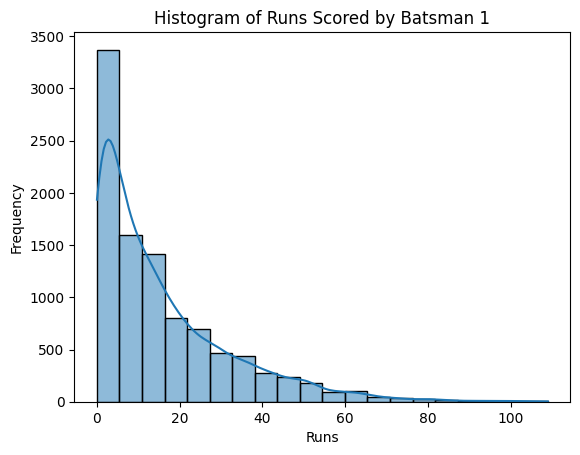

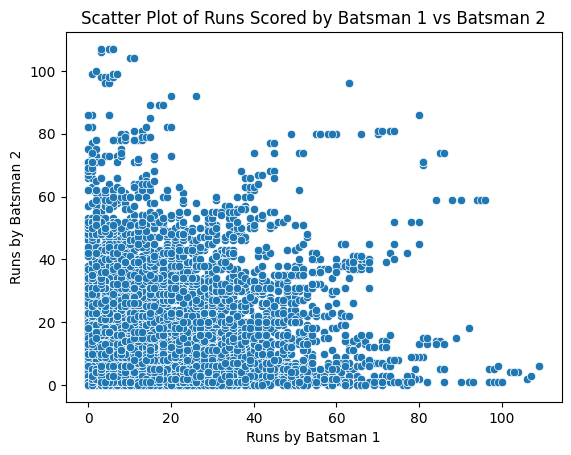

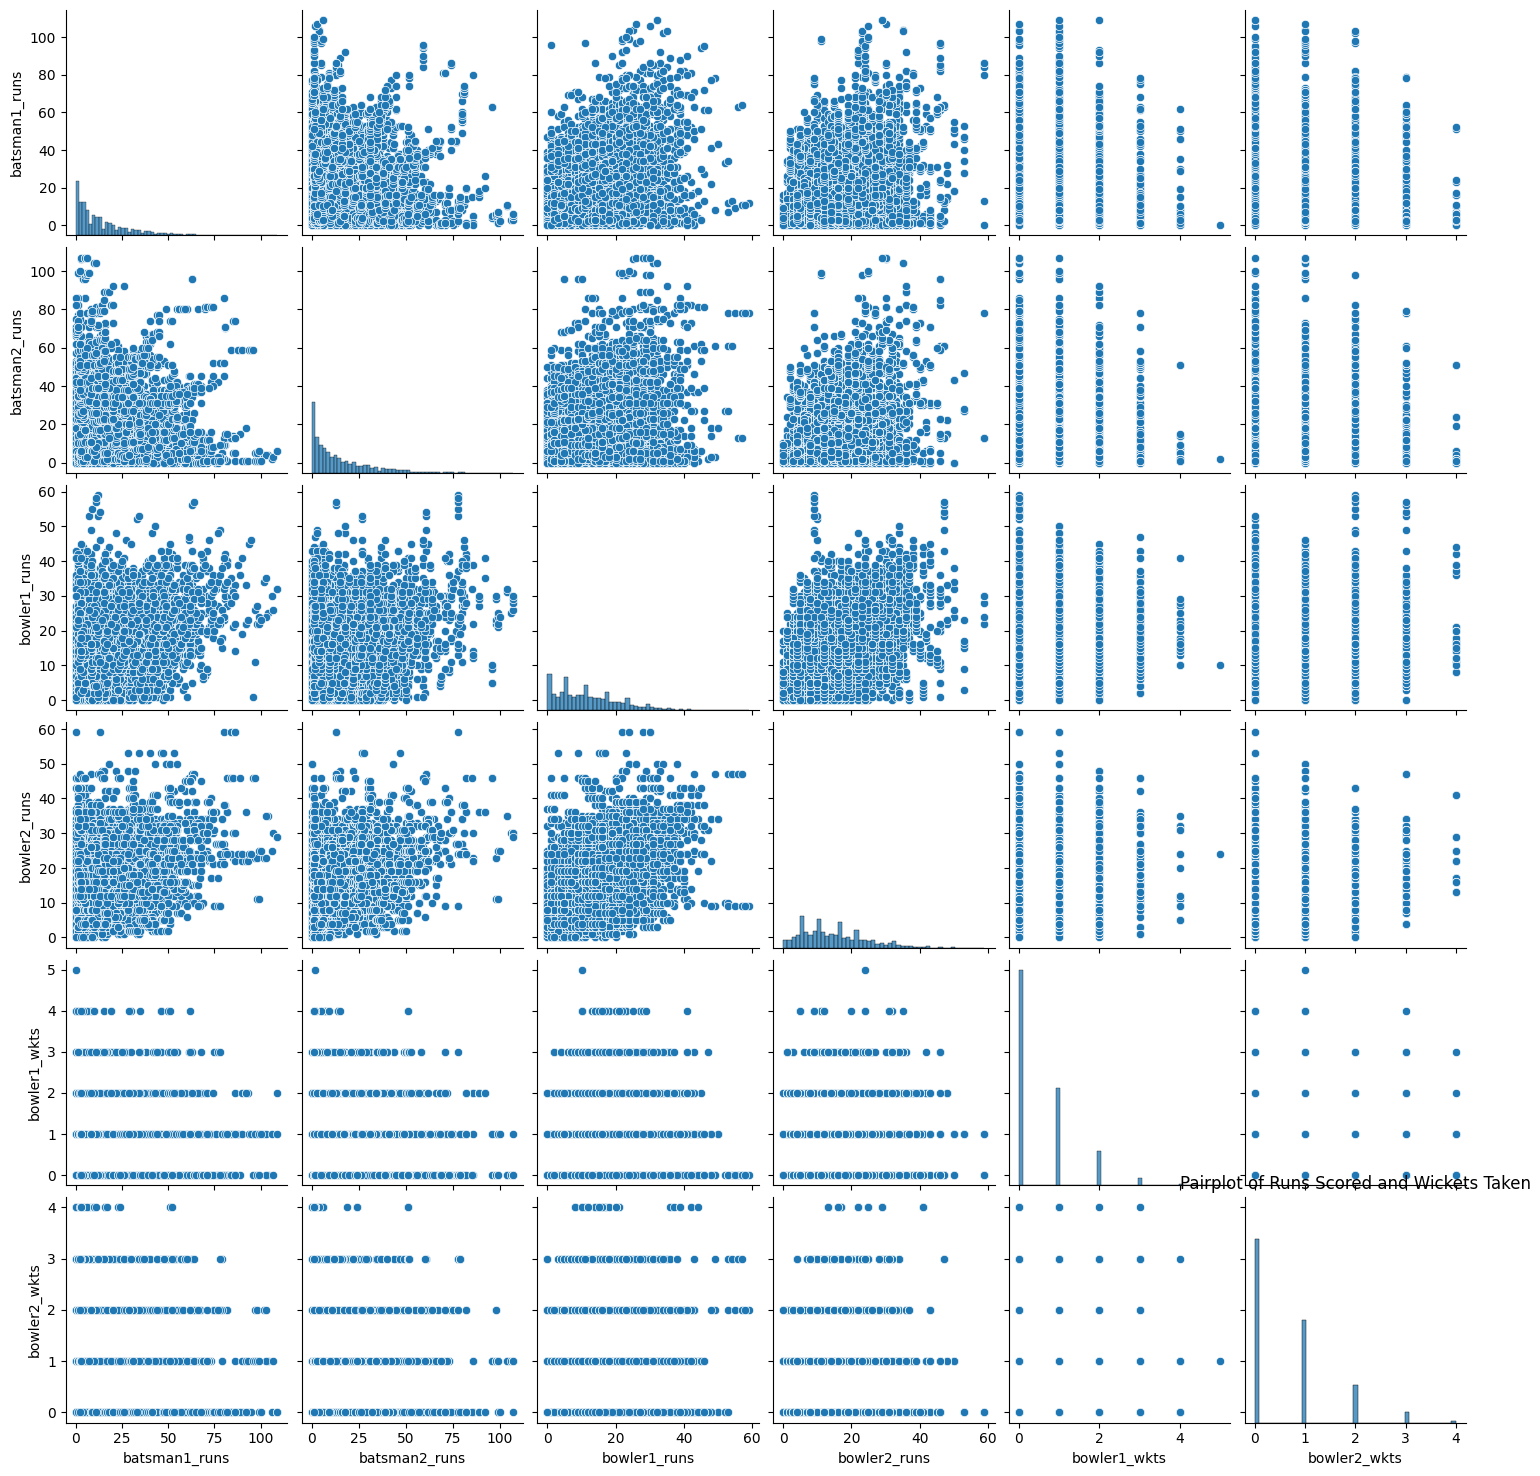

In [112]:


# Single Variate Analysis
# Let's plot a histogram of runs scored by batsman 1
sns.histplot(t20_data['batsman1_runs'], bins=20, kde=True)
plt.title('Histogram of Runs Scored by Batsman 1')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
# Let's plot a scatter plot of runs scored by batsman 1 vs runs scored by batsman 2
sns.scatterplot(x='batsman1_runs', y='batsman2_runs', data=t20_data)
plt.title('Scatter Plot of Runs Scored by Batsman 1 vs Batsman 2')
plt.xlabel('Runs by Batsman 1')
plt.ylabel('Runs by Batsman 2')
plt.show()

# Multivariate Analysis
# Let's create a pairplot to visualize relationships between multiple variables
# We'll focus on runs scored by batsmen, runs conceded by bowlers, and wickets taken by bowlers
multivariate_data = t20_data[['batsman1_runs', 'batsman2_runs', 'bowler1_runs', 'bowler2_runs', 'bowler1_wkts', 'bowler2_wkts']]
sns.pairplot(multivariate_data)
plt.title('Pairplot of Runs Scored and Wickets Taken')
plt.show()


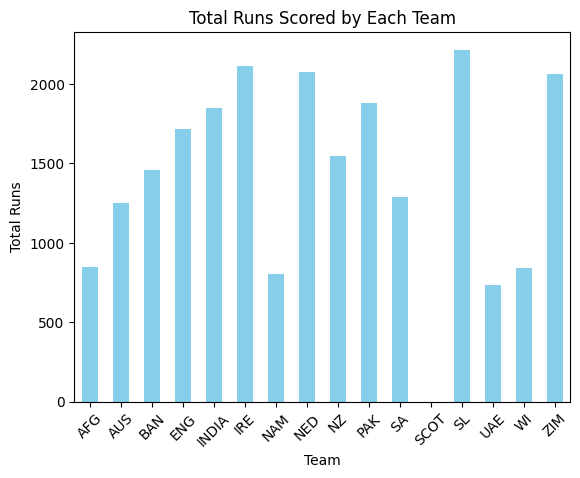

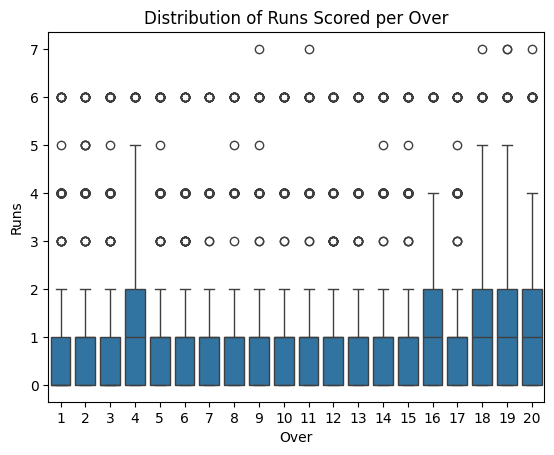

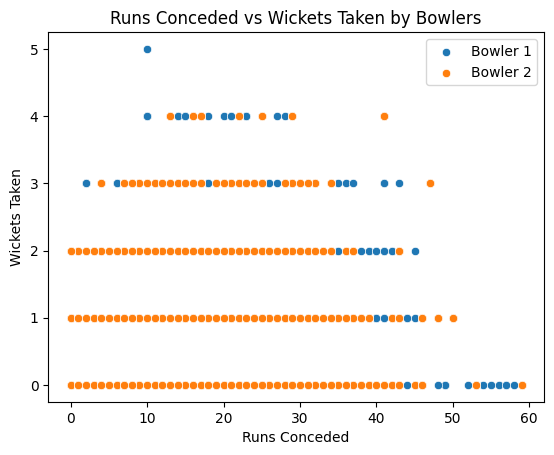

In [115]:

# Single Variate Analysis
# Let's plot a bar chart of total runs scored by each team
team_runs = t20_data.groupby('home_team')['runs'].sum() + t20_data.groupby('away_team')['runs'].sum()
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

# Let's visualize the distribution of runs scored per over
sns.boxplot(x='over', y='runs', data=t20_data)
plt.title('Distribution of Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()


# Let's visualize the relationship between runs scored and wickets taken by bowlers
sns.scatterplot(x='bowler1_runs', y='bowler1_wkts', data=t20_data, label='Bowler 1')
sns.scatterplot(x='bowler2_runs', y='bowler2_wkts', data=t20_data, label='Bowler 2')
plt.title('Runs Conceded vs Wickets Taken by Bowlers')
plt.xlabel('Runs Conceded')
plt.ylabel('Wickets Taken')
plt.legend()
plt.show()


C:\Users\we\AppData\Local\Temp\ipykernel_6624\2786122664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=batting_performance.index, y='Total Runs', data=batting_performance, palette='viridis')


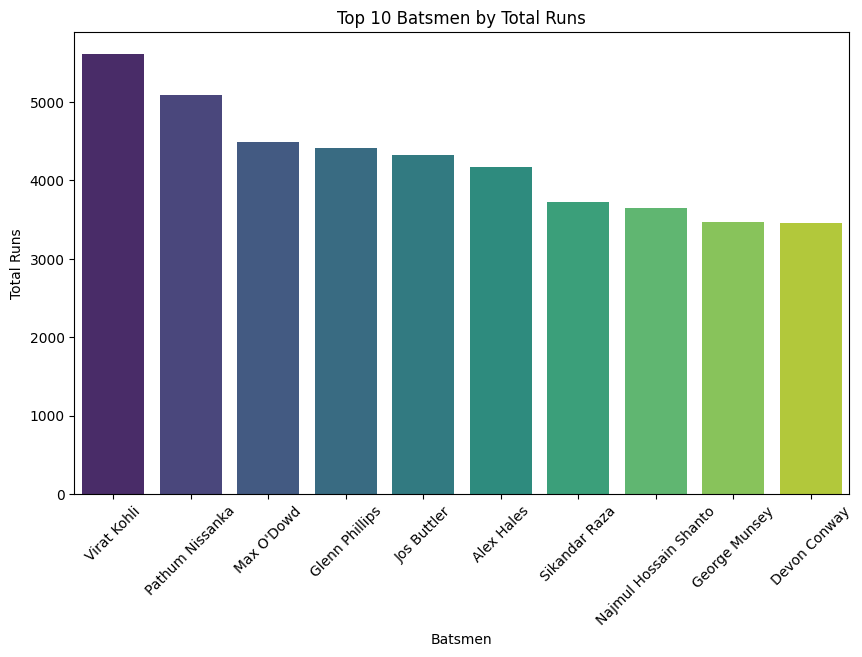

C:\Users\we\AppData\Local\Temp\ipykernel_6624\2786122664.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bowling_performance.index, y='bowler1_wkts', data=bowling_performance, palette='rocket')


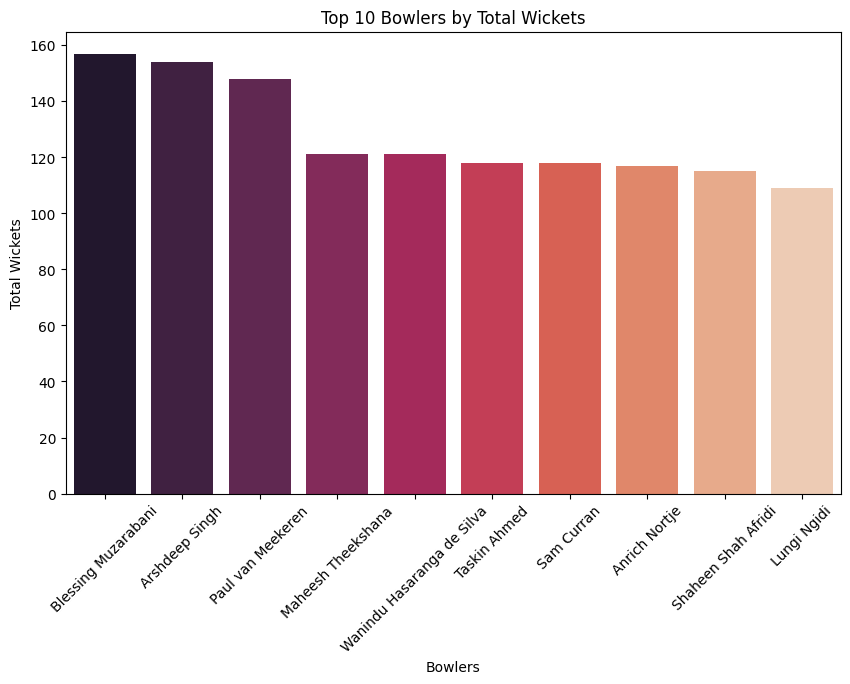

C:\Users\we\AppData\Local\Temp\ipykernel_6624\2786122664.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_rounders.index, y='Total Runs & Wickets', data=all_rounders, palette='mako')


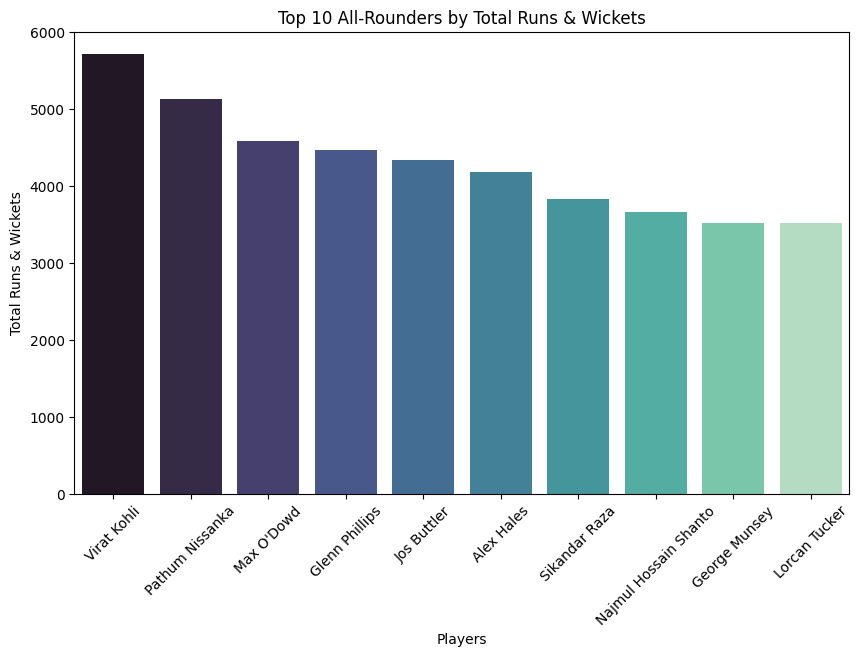

C:\Users\we\AppData\Local\Temp\ipykernel_6624\2786122664.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette='crest')


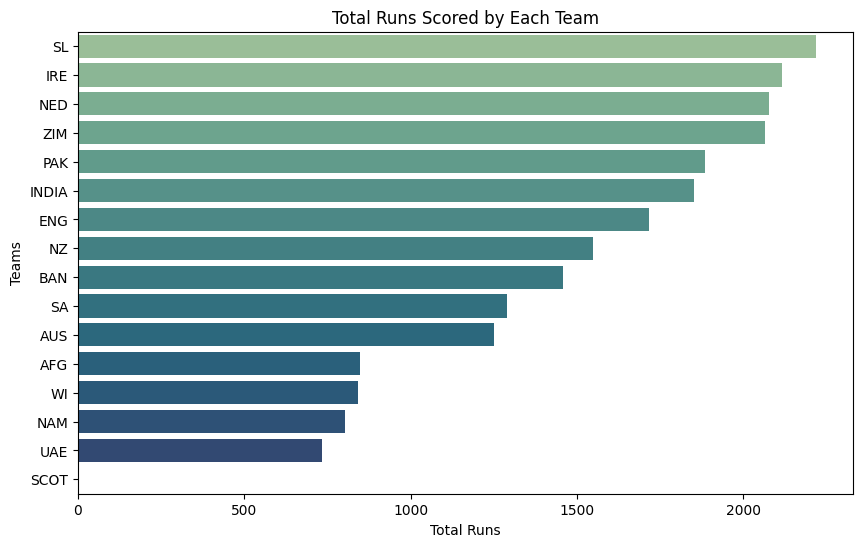

KeyError: 'Column not found: result'

In [116]:
# Batting Performance Evaluation
batting_performance = t20_data.groupby('batsman1_name').agg({'batsman1_runs': ['sum', 'mean'],
                                                             'batsman1_balls': 'count',
                                                             'isBoundary': lambda x: (x.sum() / len(x)) * 100})
batting_performance.columns = ['Total Runs', 'Average Runs per Inning', 'Matches Played', 'Boundary Percentage']
batting_performance = batting_performance.sort_values(by='Total Runs', ascending=False).head(10)

# Visualization: Top 10 Batsmen by Total Runs
plt.figure(figsize=(10, 6))
sns.barplot(x=batting_performance.index, y='Total Runs', data=batting_performance, palette='viridis')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

# Bowling Performance Evaluation
bowling_performance = t20_data.groupby('bowler1_name').agg({'bowler1_wkts': 'sum',
                                                             'bowler1_runs': 'sum',
                                                             'bowler1_overs': 'sum'})
bowling_performance['Bowling Average'] = bowling_performance['bowler1_runs'] / bowling_performance['bowler1_wkts']
bowling_performance['Economy Rate'] = bowling_performance['bowler1_runs'] / (bowling_performance['bowler1_overs'] * 6)
bowling_performance = bowling_performance.sort_values(by='bowler1_wkts', ascending=False).head(10)

# Visualization: Top 10 Bowlers by Total Wickets
plt.figure(figsize=(10, 6))
sns.barplot(x=bowling_performance.index, y='bowler1_wkts', data=bowling_performance, palette='rocket')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

# All-Round Performance Evaluation
all_rounders = t20_data.groupby('batsman1_name').agg({'batsman1_runs': 'sum',
                                                      'bowler1_wkts': 'sum'})
all_rounders['Total Runs & Wickets'] = all_rounders['batsman1_runs'] + all_rounders['bowler1_wkts']
all_rounders = all_rounders.sort_values(by='Total Runs & Wickets', ascending=False).head(10)

# Visualization: Top 10 All-Rounders by Total Runs & Wickets
plt.figure(figsize=(10, 6))
sns.barplot(x=all_rounders.index, y='Total Runs & Wickets', data=all_rounders, palette='mako')
plt.title('Top 10 All-Rounders by Total Runs & Wickets')
plt.xlabel('Players')
plt.ylabel('Total Runs & Wickets')
plt.xticks(rotation=45)
plt.show()

# Team Performance Evaluation
team_runs = t20_data.groupby('home_team')['runs'].sum() + t20_data.groupby('away_team')['runs'].sum()
team_runs = team_runs.sort_values(ascending=False)

# Visualization: Total Runs Scored by Each Team
plt.figure(figsize=(10, 6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette='crest')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.show()

# Win-Loss Record
team_wins = t20_data.groupby('home_team')['result'].apply(lambda x: (x == 'won').sum()) + \
            t20_data.groupby('away_team')['result'].apply(lambda x: (x == 'won').sum())
team_losses = t20_data.groupby('home_team')['result'].apply(lambda x: (x == 'lost').sum()) + \
              t20_data.groupby('away_team')['result'].apply(lambda x: (x == 'lost').sum())
team_win_loss = pd.DataFrame({'Wins': team_wins, 'Losses': team_losses})
team_win_loss['Win-Loss Ratio'] = team_win_loss['Wins'] / team_win_loss['Losses']



In [ ]:
)



# Win-Loss Record
team_wins = t20_data['home_team'].value_counts() + t20_data['away_team'].value_counts()
team_losses = t20_data['home_team'].isin(team_wins.index) & (t20_data['result'] != 'won')
team_losses = t20_data['away_team'].isin(team_wins.index) & (t20_data['result'] != 'won')
team_win_loss = pd.DataFrame({'Wins': team_wins, 'Losses': team_losses})
team_win_loss['Win-Loss Ratio'] = team_win_loss['Wins'] / team_win_loss['Losses']

# Visualization: Win-Loss Ratio of Each Team
plt.figure(figsize=(10, 6))
team_win_loss['Win-Loss Ratio'].plot(kind='bar', color='skyblue')
plt.title('Win-Loss Ratio of Each Team')
plt.xlabel('Team')
plt.ylabel('Win-Loss Ratio')
plt.xticks(rotation=45)
plt.show()


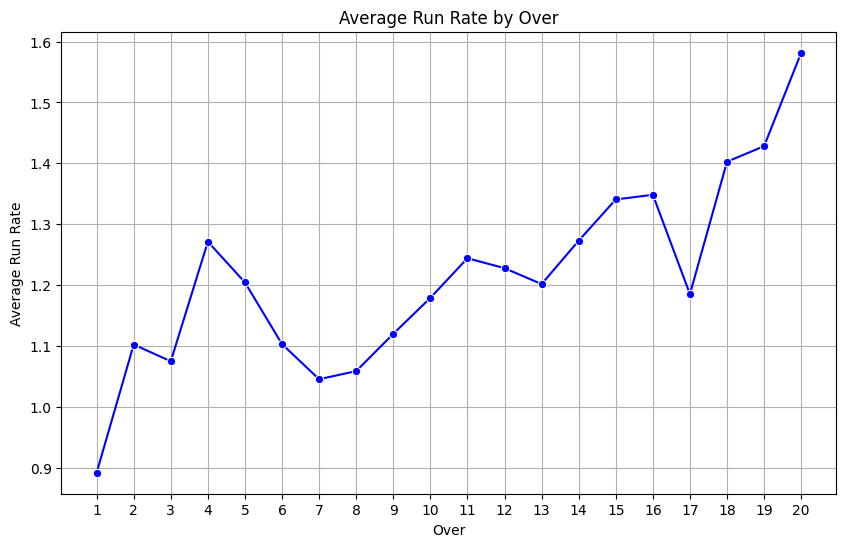

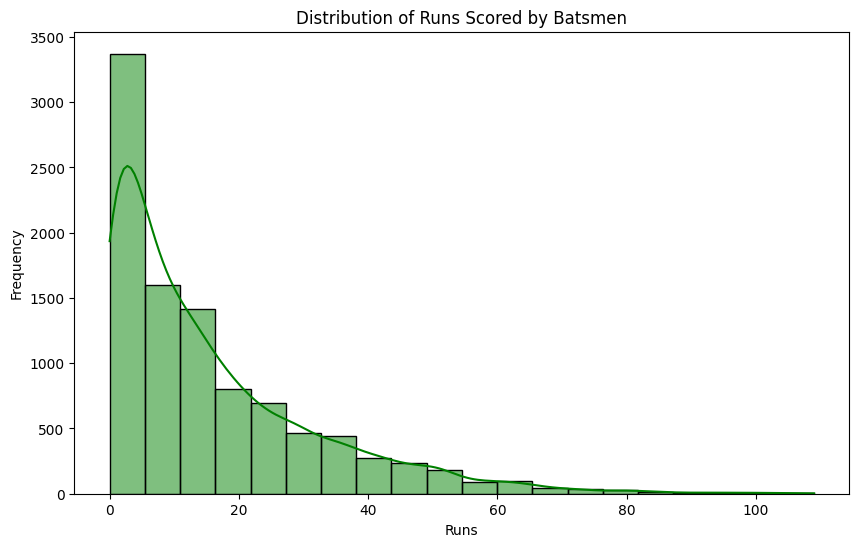

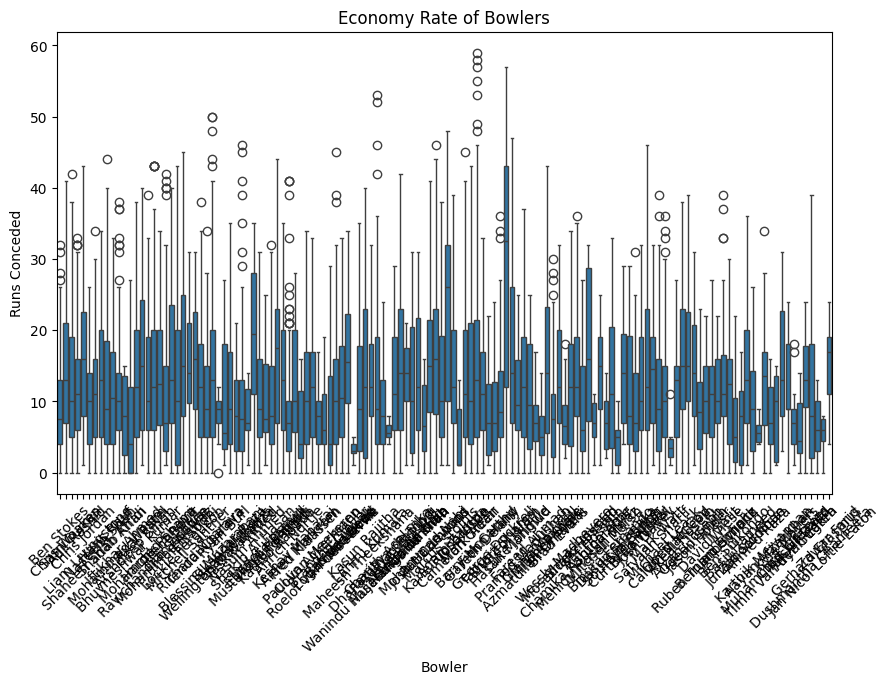

KeyError: 'result'

In [117]:


# Team Strategies
# Analyzing run rates in different overs to understand batting strategies
run_rate_by_over = t20_data.groupby('over')['runs'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=run_rate_by_over.index, y=run_rate_by_over.values, marker='o', color='blue')
plt.title('Average Run Rate by Over')
plt.xlabel('Over')
plt.ylabel('Average Run Rate')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

# Batting Performance
# Distribution of runs scored by each batsman
plt.figure(figsize=(10, 6))
sns.histplot(t20_data['batsman1_runs'], bins=20, kde=True, color='green')
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Bowling Performance
# Economy rate of bowlers
plt.figure(figsize=(10, 6))
sns.boxplot(x='bowler1_name', y='bowler1_runs', data=t20_data)
plt.title('Economy Rate of Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Runs Conceded')
plt.xticks(rotation=45)
plt.show()




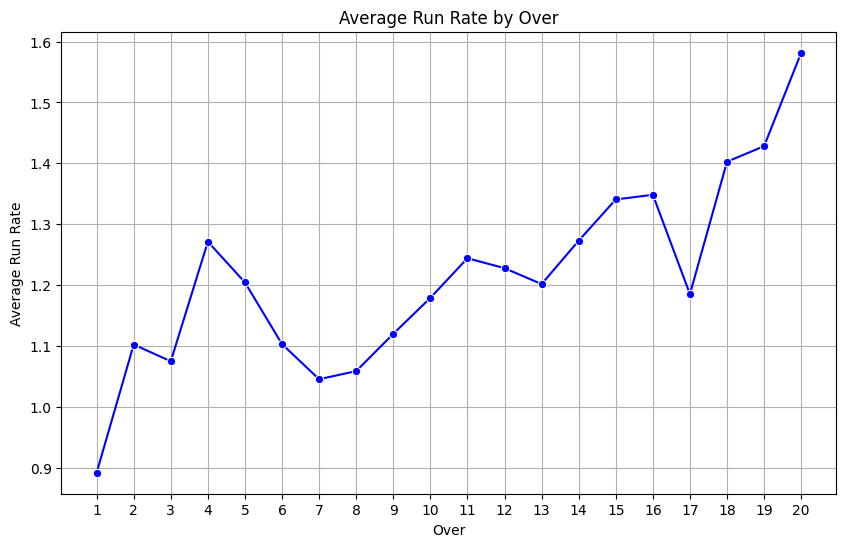

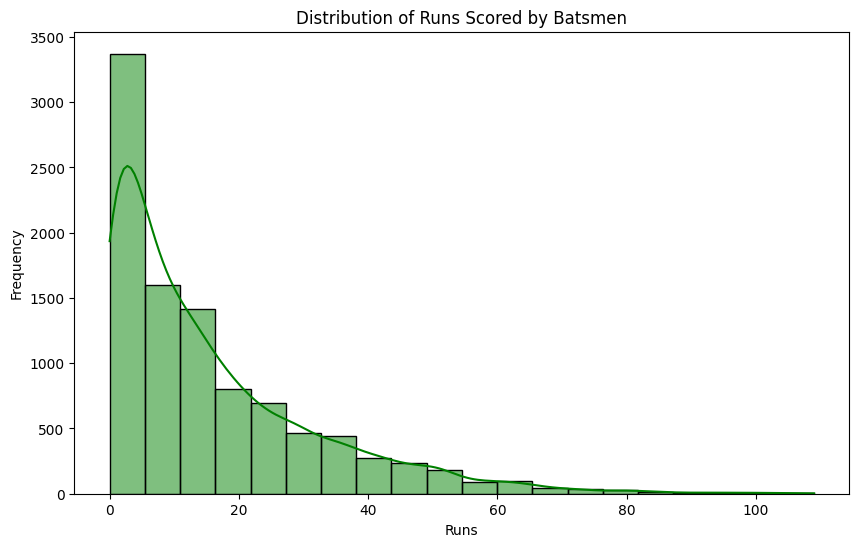

C:\Users\we\AppData\Local\Temp\ipykernel_6624\327958985.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers['Economy Rate'], y=top_bowlers.index, palette='magma')


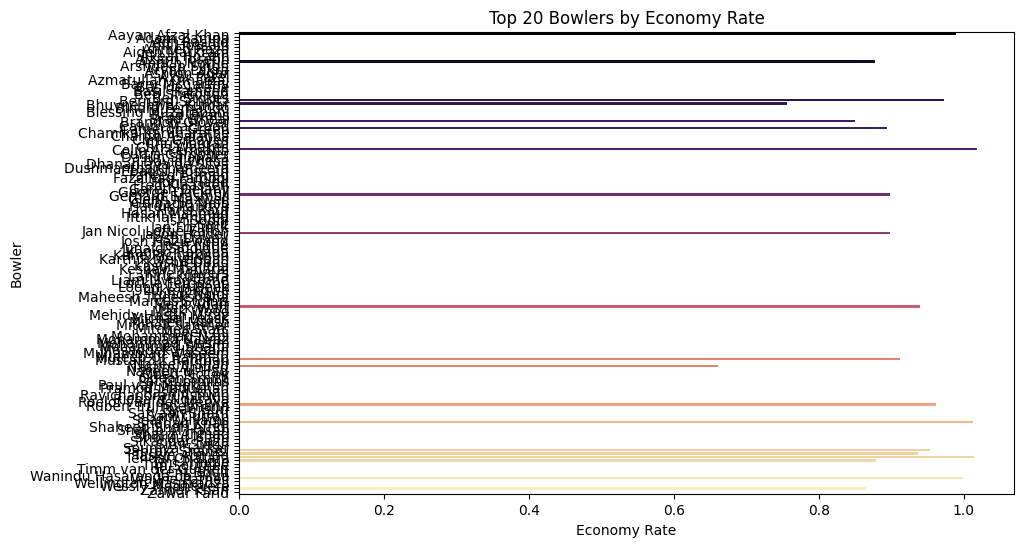

C:\Users\we\AppData\Local\Temp\ipykernel_6624\327958985.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bowling_strike_rate.values, y=bowling_strike_rate.index, palette='viridis')


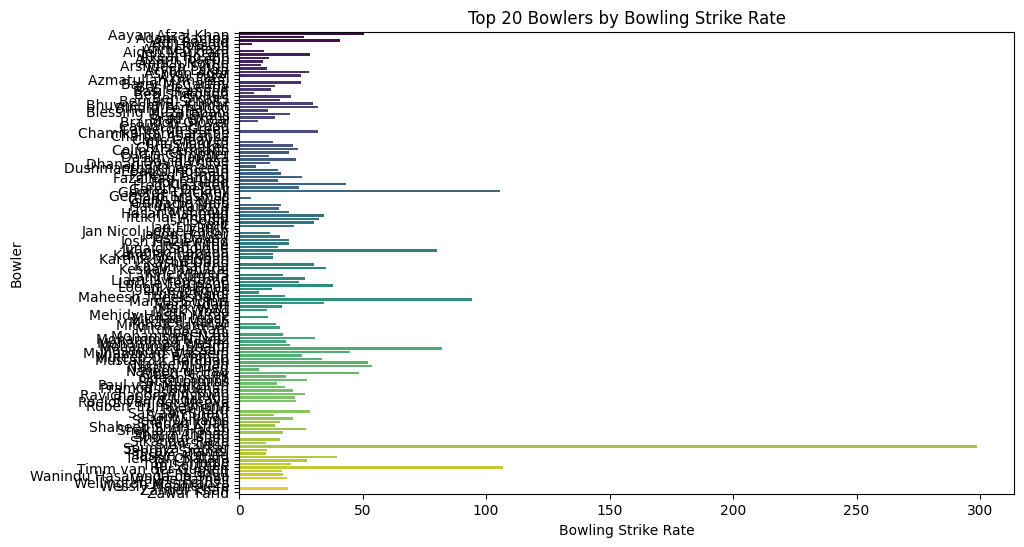

NameError: name 'powerplay_runs' is not defined

<Figure size 800x600 with 0 Axes>

In [118]:
# Team Strategies
# Analyzing run rates in different overs to understand batting strategies
run_rate_by_over = t20_data.groupby('over')['runs'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=run_rate_by_over.index, y=run_rate_by_over.values, marker='o', color='blue')
plt.title('Average Run Rate by Over')
plt.xlabel('Over')
plt.ylabel('Average Run Rate')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

# Batting Performance
# Distribution of runs scored by each batsman
plt.figure(figsize=(10, 6))
sns.histplot(t20_data['batsman1_runs'], bins=20, kde=True, color='green')
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Bowling Performance
# Economy rate of top 20 bowlers
top_bowlers = t20_data.groupby('bowler1_name').agg({'bowler1_runs': 'sum', 'bowler1_overs': 'sum'})
top_bowlers['Economy Rate'] = (top_bowlers['bowler1_runs'] / (top_bowlers['bowler1_overs'] * 6)).sort_values().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers['Economy Rate'], y=top_bowlers.index, palette='magma')
plt.title('Top 20 Bowlers by Economy Rate')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()

# Additional Insights

# Bowling Strike Rate

plt.figure(figsize=(10, 6))
sns.barplot(x=bowling_strike_rate.values, y=bowling_strike_rate.index, palette='viridis')
plt.title('Top 20 Bowlers by Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Bowler')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=['Powerplay', 'Non-Powerplay'], y=[powerplay_runs, non_powerplay_runs], palette='Set3')
plt.title('Average Runs Scored in Powerplay vs. Non-Powerplay Overs')
plt.xlabel('Over Type')
plt.ylabel('Average Runs Scored')
plt.show()

# Boundary Percentage by Team
boundary_percentage_by_team = t20_data.groupby('home_team')['isBoundary'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=boundary_percentage_by_team.values, y=boundary_percentage_by_team.index, palette='cubehelix')
plt.title('Boundary Percentage by Team')
plt.xlabel('Boundary Percentage')
plt.ylabel('Team')
plt.show()

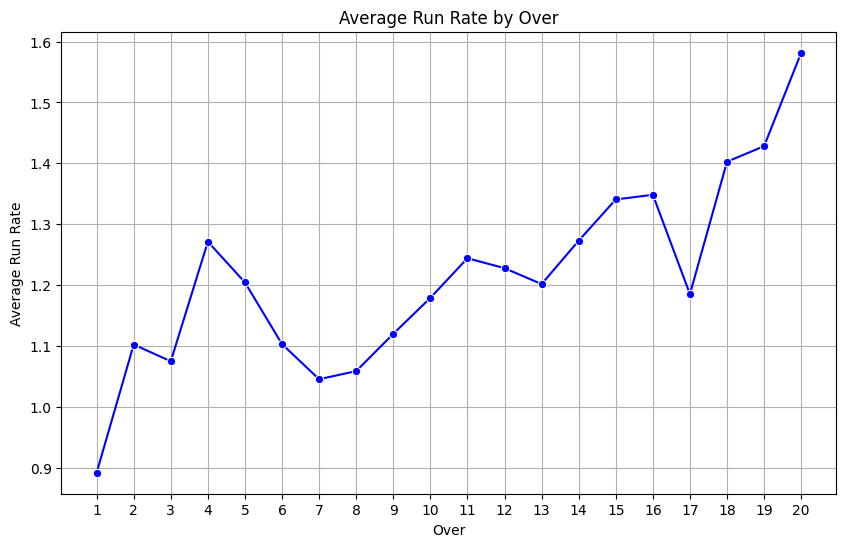

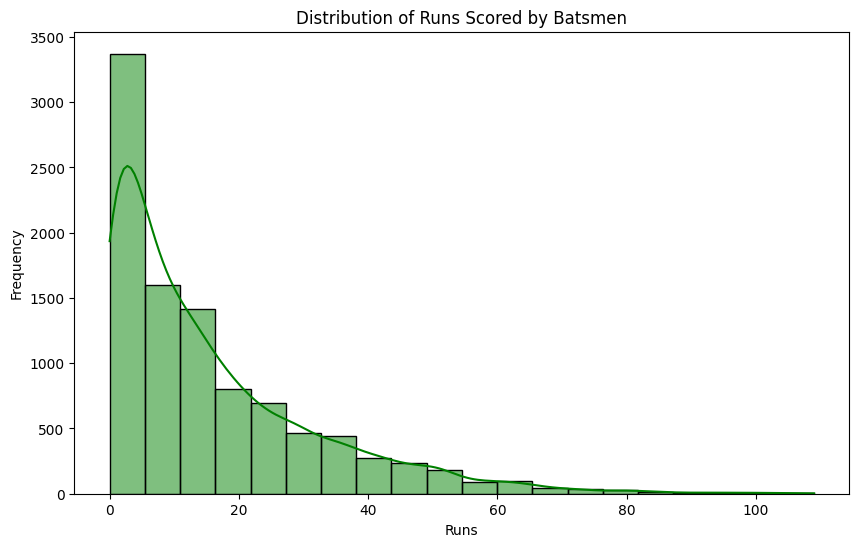

C:\Users\we\AppData\Local\Temp\ipykernel_6624\2944327557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers_10['Economy Rate'], y=top_bowlers_10.index, palette='magma')


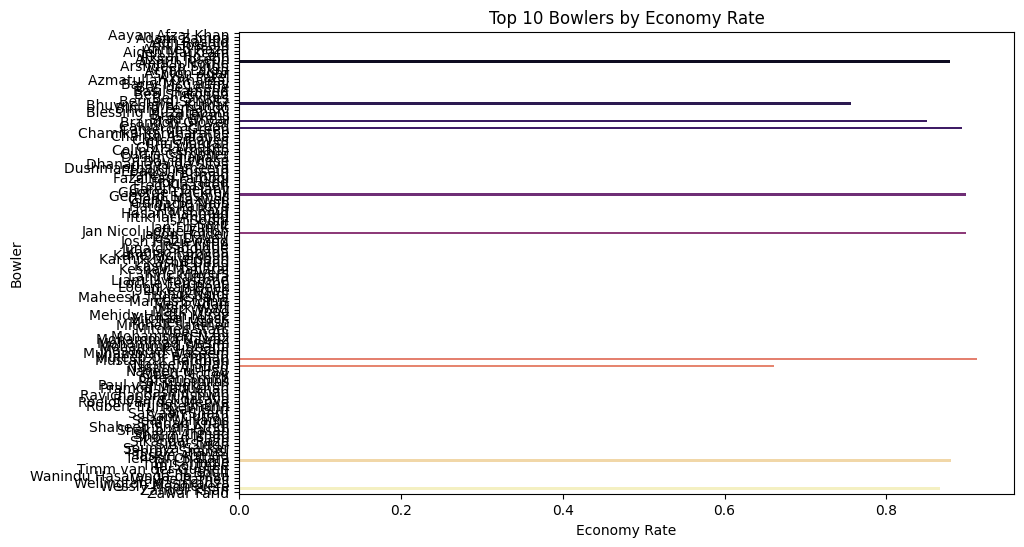

KeyError: 'Column not found: bowler1_balls'

In [119]:
run_rate_by_over = t20_data.groupby('over')['runs'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=run_rate_by_over.index, y=run_rate_by_over.values, marker='o', color='blue')
plt.title('Average Run Rate by Over')
plt.xlabel('Over')
plt.ylabel('Average Run Rate')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

# Batting Performance
# Distribution of runs scored by each batsman
plt.figure(figsize=(10, 6))
sns.histplot(t20_data['batsman1_runs'], bins=20, kde=True, color='green')
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Bowling Performance
# Economy rate of top 10 bowlers
top_bowlers_10 = t20_data.groupby('bowler1_name').agg({'bowler1_runs': 'sum', 'bowler1_overs': 'sum'})
top_bowlers_10['Economy Rate'] = (top_bowlers_10['bowler1_runs'] / (top_bowlers_10['bowler1_overs'] * 6)).sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers_10['Economy Rate'], y=top_bowlers_10.index, palette='magma')
plt.title('Top 10 Bowlers by Economy Rate')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()

# Additional Insights

# Bowling Strike Rate
# Calculate the average number of balls bowled per wicket taken for each bowler
bowling_strike_rate_10 = (t20_data.groupby('bowler1_name')['bowler1_balls'].sum() / 
                        t20_data.groupby('bowler1_name')['bowler1_wkts'].sum()).sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=bowling_strike_rate_10.values, y=bowling_strike_rate_1.index, palette='viridis')
plt.title('Top 10 Bowlers by Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Bowler')
plt.show()

# Match Outcomes
# Runs scored in powerplay overs vs. non-powerplay overs
powerplay_runs = t20_data[t20_data['over'] <= 6]['runs'].mean()
non_powerplay_runs = t20_data[t20_data['over'] > 6]['runs'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Powerplay', 'Non-Powerplay'], y=[powerplay_runs, non_powerplay_runs], palette='Set3')
plt.title('Average Runs Scored in Powerplay vs. Non-Powerplay Overs')
plt.xlabel('Over Type')
plt.ylabel('Average Runs Scored')
plt.show()